In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns
sns.set(font="AppleGothic", 
        rc={"axes.unicode_minus":False})
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler, scale

### 주성분 분석 - PCA(Principal Component Analysis)
PCA는 데이터를 낮은 차원으로 투영해 차원을 줄인다

활용 분야
- 차원의 저주를 완화
- 정보 손실을 최소화하면서 데이터를 압축
- 주성분은 다음 단계의 지도학습(랜덤 포레스트, 부스팅등)에 사용됨
- 수백 차원의 데이터 구조는 이해하기 힘드므로 2차원이나 3차원으로 관착값의 차원을 축소해 시각적으로 이해하기 쉽도록 도와준다.

### 필기체 숫자 PCA 

In [3]:
# 데이터 불러오기
digits = load_digits()

In [4]:
# 데이터 정보
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [5]:
# 입출력 데이터
x_data = digits.data
y_data = digits.target

x_data.shape, y_data.shape

((1797, 64), (1797,))

In [16]:
# 데이터 차원의 차이로 인한 문제를 없애기 위해 입력값의 크기를 비슷하게 조절
x_scale = scale(x_data)

#### 2차원 축소

In [17]:
pca = PCA(n_components=2)
reduced_x = pca.fit_transform(x_scale)

In [18]:
reduced_x

array([[ 1.91422039, -0.95451181],
       [ 0.58897924,  0.92461179],
       [ 1.30204481, -0.31716316],
       ...,
       [ 1.0226017 , -0.14796453],
       [ 1.0760566 , -0.38095765],
       [-1.2576997 , -2.227612  ]])

In [28]:
pca_df = pd.DataFrame(reduced_x, columns=['x', 'y'])
pca_df['target'] = y_data
pca_df

,x,y,target
0,1.914220,-0.954512,0
1,0.588979,0.924612,1
2,1.302045,-0.317163,2
3,-3.020772,-0.868756,3
4,4.528957,-1.093483,4
...,...,...,...
1792,0.104326,0.255012,9
1793,2.423232,-1.429585,0
1794,1.022602,-0.147965,8
1795,1.076057,-0.380958,9


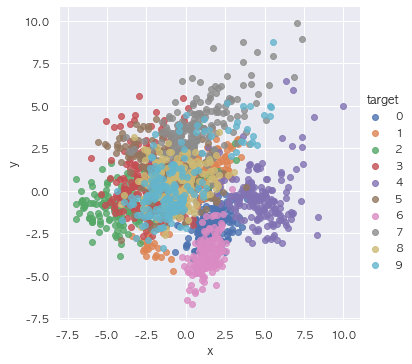

In [30]:
# 2차원 데이터 분포 시각화
sns.lmplot(x='x', y='y', data=pca_df, fit_reg=False, hue='target')
plt.show()

#### 3차원 축소

In [31]:
pca = PCA(n_components=3)
reduced_x = pca.fit_transform(x_scale)

In [32]:
reduced_x

array([[ 1.91420518, -0.95451141, -3.94601542],
       [ 0.58898776,  0.92463859,  3.92473484],
       [ 1.30205119, -0.31718589,  3.02330894],
       ...,
       [ 1.02258546, -0.14790373,  2.47000061],
       [ 1.07603923, -0.38090605, -2.45544079],
       [-1.25772634, -2.22759255,  0.28369389]])

In [33]:
pca_df = pd.DataFrame(reduced_x, columns=['x', 'y', 'z'])
pca_df['target'] = y_data
pca_df

,x,y,z,target
0,1.914205,-0.954511,-3.946015,0
1,0.588988,0.924639,3.924735,1
2,1.302051,-0.317186,3.023309,2
3,-3.020753,-0.868767,-0.801784,3
4,4.528952,-1.093491,0.973115,4
...,...,...,...,...
1792,0.104310,0.255019,-3.765820,9
1793,2.423232,-1.429600,-3.045254,0
1794,1.022585,-0.147904,2.470001,8
1795,1.076039,-0.380906,-2.455441,9


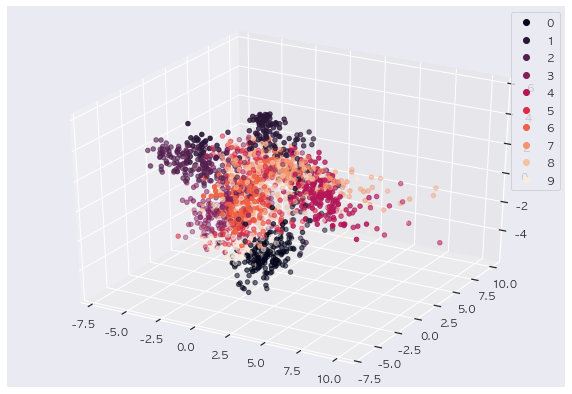

In [51]:
# 3차원 데이터 분포 시각화
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(pca_df['x'], pca_df['y'], pca_df['z'], c=pca_df['target'])
plt.legend(*sc.legend_elements())
plt.show()

#### 클러스터 개수
클러스터의 개수를 결정할 두 가지 기준
- 전체 설명된 분산이 미미하게 감소하기 시작하는 시점
- 설명된 분산이 전체의 80% 이상일 경우

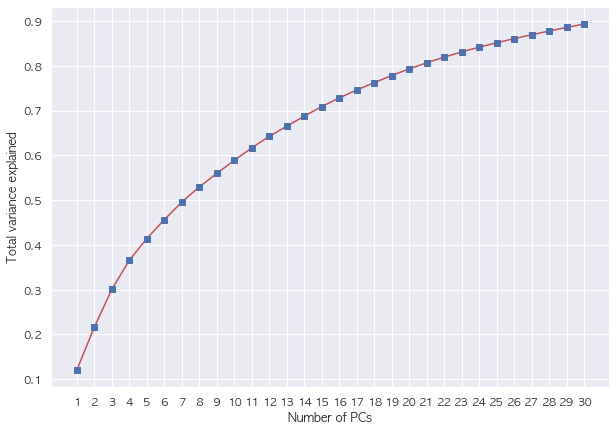

In [56]:
# 주성분 개수의 변화에 따른 전체 설명된 분산의 비율 시각화
# 주성분의 개수가 올라갈수록 설명된 분산의 비율도 증가할 것이다. 그러나 주성분의 개수는 적을수록 좋다 따라서 절충점은 분산의 설명 폭이 감소하기 시작하는 시점이 된다.

# 주성분 개수 설정
max_pc = 30

pcs = []
totexp_var = []

for i in range(max_pc):
    pca = PCA(n_components=i+1)
    reduced_x = pca.fit_transform(x_scale)
    tot_var = pca.explained_variance_ratio_.sum()
    pcs.append(i+1)
    totexp_var.append(tot_var)
    
plt.plot(pcs, totexp_var, 'r')
plt.plot(pcs, totexp_var, 'bs')
plt.xlabel('Number of PCs')
plt.ylabel('Total variance explained')
plt.xticks(pcs)
plt.show()

주성분 개수가 10이 되는 지점에서 전체 분산의 해석 증가 폭이 감소하고 주성분 개수가 21이 되는 지점에서 전체 분산이 80%이상 해석되는 것을 볼 수 있다.